In [5]:
#importing the dependencies:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [21]:
#defining the state:
class bmistate(TypedDict) :
    weight_kg:float
    height_m:float
    bmi:float
    category:str

In [ ]:
#bmi calulator node:
def bmi_calculator(state:bmistate) ->bmistate :
    weight=state['weight_kg']
    height=state['height_m']

    bmi=weight/(height**2)

    state['bmi']=round(bmi,2)
    return state

In [ ]:
#bmi labeler:
def bmi_label(state:bmistate) ->bmistate:

    bmi=state['bmi']

    if bmi < 18.5:
        print("Category: Underweight")

    elif 18.5 <= bmi < 25:
        print("Category: Normal weight")

    elif 25 <= bmi < 30:
        print("Category: Overweight")
    
    else:
        print("Category: Obese")

    return state

In [24]:
#define your graph:
#start --> bmi_calc -->label_bmi --> end

graph=StateGraph(bmistate)

#add nodes in the graph:
graph.add_node('bmicalculator',bmi_calculator)
graph.add_node('bmilabel',bmi_label)

# add edges in the graph:
graph.add_edge(START,'bmicalculator')
graph.add_edge('bmicalculator','bmilabel')
graph.add_edge('bmilabel',END)

#compile the graph:
workflow=graph.compile()



In [25]:
#execute the graph:
inital_state={'weight_kg':72,'height_m':1.80}
final_state=workflow.invoke(inital_state)
print(final_state)

Category: Normal weight
{'weight_kg': 72, 'height_m': 1.8, 'bmi': 22.22}


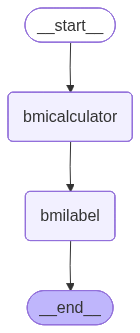

In [26]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())